# Image Processing Lab 2  
Dr. Amr Amin  
Ahmed Alqassas    
Autumn 2024-25

# Review
**Sampling affects spatial resolution** by determining the density of pixels and, consequently, the level of detail captured in the image.  
**Quantization affects intensity resolution** by determining how many different intensity values can be represented, impacting the image's tonal richness.  
**Aliasing** Occurs when the sampling rate is too low to capture the detail in the image, leading to distortion.  
**Quantization Error** is the difference between the actual continuous intensity and the quantized value.

# Image Processing in Spacial Domain
The term spatial domain refers to the image plane itself, and image processing methods in this category are _based on direct manipulation of pixels in an image_.  
Two principal categories of spatial processing are:  
- **Intensity transformations**: operate on single pixels of an image.
- **Spatial filtering**: performs operations on the neighborhood of every pixel in an image.

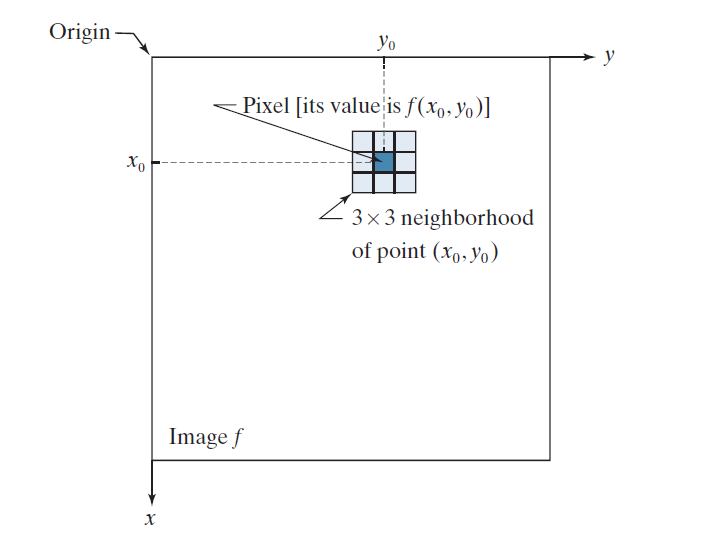

# **Hands-on** Contrast Stretching
Contrast stretching expands the range of intensity levels in an image so that it spans the ideal full intensity range of the recording medium or display device.

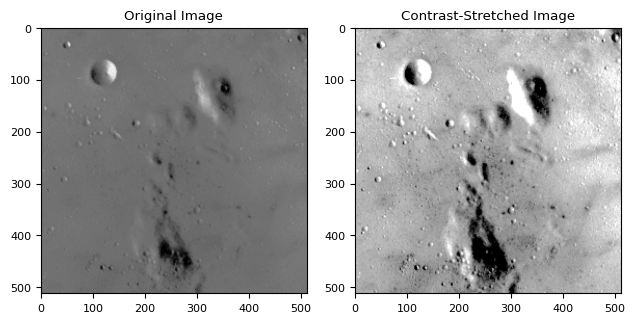

In [1]:
from skimage import data, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 8


# Load an example image
image = data.moon()

# Apply contrast stretching
p2, p98 = np.percentile(image, (2, 98))
stretched_image = exposure.rescale_intensity(image, in_range=(p2, p98))


fig, ax = plt.subplots(1, 2)

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(stretched_image, cmap='gray')
ax[1].set_title('Contrast-Stretched Image')

fig.tight_layout()
plt.show()

# Histograms
An image histogram is a graphical representation that shows the distribution of pixel intensity values in an image.

# **Hands-on** Creating and Interpreting Histogram


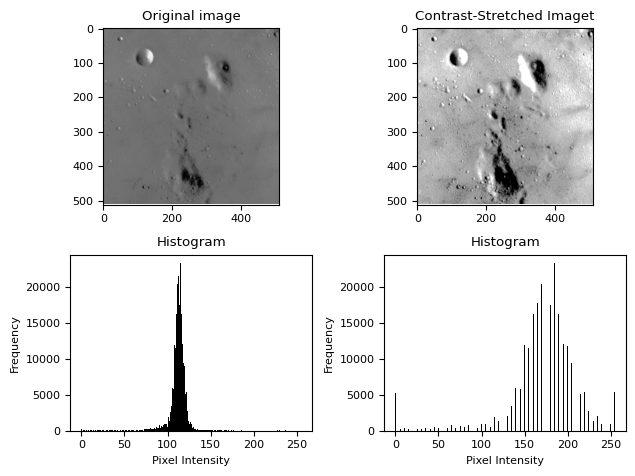

In [2]:
# Plotting
figure, ax = plt.subplots(2, 2)

# Plot first Image
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

# Plot second Image
ax[0, 1].imshow(stretched_image, cmap='gray', )
ax[0, 1].set_title('Contrast-Stretched Imaget')

# Plot second histogram
ax[1, 0].hist(image.ravel(), bins= 256, color='black')
ax[1, 0].set_title('Histogram')
ax[1, 0].set_xlabel('Pixel Intensity')
ax[1, 0].set_ylabel('Frequency')

# Plot second histogram
ax[1, 1].hist(stretched_image.ravel(), bins= 256,  color='k')
ax[1, 1].set_title('Histogram')
ax[1, 1].set_xlabel('Pixel Intensity')
ax[1, 1].set_ylabel('Frequency')


figure.tight_layout()
plt.show()

## Interpret the histogram  


**Dark Image**: Histogram peaks at lower intensity values.  
**Bright Image**: Histogram peaks at higher intensity values.  
**Low Contrast**: Histogram is narrow and concentrated.  
**High Contrast**: Histogram spans a wide range of intensity values.

# **Hands-on** calculating Root Mean Square RMS contrast
The RMS (Root Mean Square) contrast, which quantifies the standard deviation of pixel intensities in the grayscale image.   
RMS contrast is calculated as follows:

$$
C = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (I_i - \bar{I})^2}
$$

In [3]:
# Calculate the RMS contrast for gray_image
mean_intensity_1 = np.mean(image)
rms_contrast_1 = np.sqrt(np.mean((image - mean_intensity_1) ** 2))
print(f'First image RMS contrast = {rms_contrast_1}')

# Calculate the RMS contrast for gray_image_low_contrast
mean_intensity_2 = np.mean(stretched_image)
rms_contrast_2 = np.sqrt(np.mean((stretched_image- mean_intensity_2) ** 2))
print(f'Second image RMS contrast = {rms_contrast_2}')

First image RMS contrast = 13.330291211858185
Second image RMS contrast = 42.27173519126207


# **Hands-on** Histogram Equalization

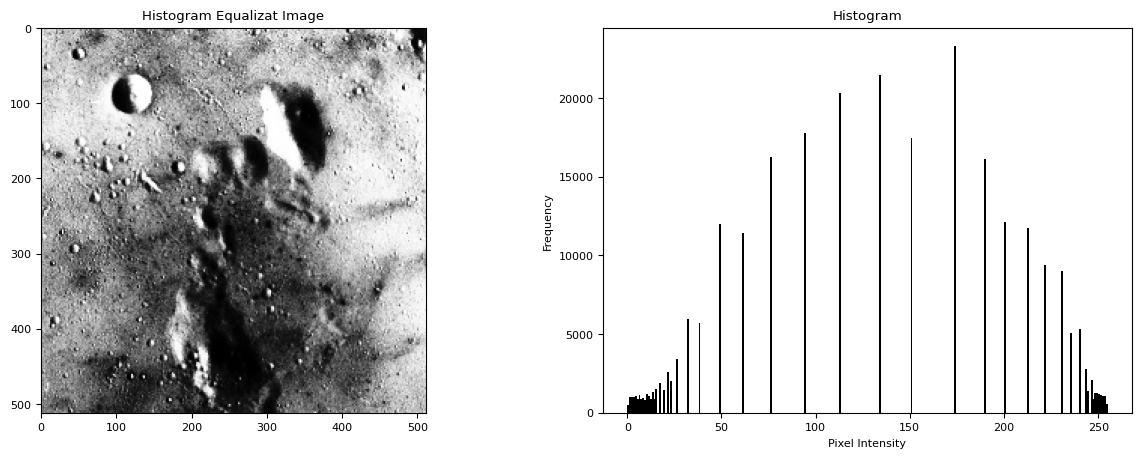

In [4]:
from skimage import exposure, img_as_ubyte

# Apply histogram equalization
img_eq = exposure.equalize_hist(image)

img_eq = img_as_ubyte(img_eq)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].imshow(img_eq, cmap='gray')
ax[0].set_title('Histogram Equalizat Image')

ax[1].hist(img_eq.ravel(), bins=256,  color='k')
ax[1].set_title('Histogram')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')

plt.show()

# **Example on** Histogram Equlaization
Histogram Equalization helps in **enchancing contrast**.    
It redistributes the intensity values so that they can span the entire range of possible values.  
Histogram Equalization improves the *global contrast* but that doesn't mean it performs well with all images.  

Given a simple image that is represented in 8 intensity level (0 to 7) as the following table shows, we will perform histogram equalization on this image.  

|Intensity Level $r_k$|0|1|2|3|4|5|6|7|Total $N$|
|---------------------|-|-|-|-|-|-|-|-|---------|
|Frequency $n_k$      |0|0|10|10|20|20|4|0|64|

**Solution**  
**Step 1** Compute the *Probability Density Function* (PDF) using the following formula: $p_k = \frac{n_k}{N}$.
|$r_k$|0|1|2     |3     |4     |5     |6     |7|
|-----|-|-|------|------|------|------|------|-|
|$n_k$|0|0|10    |10    |20    |20    |4     |0|
|$p_k$|0|0|0.1562|0.1562|0.3125|0.3125|0.0625|0|

```Python
import numpy as np

r_k = np.linspace(1,8,8)
n_k = np.array([0, 0, 10, 10, 20, 20, 0]) # Hard coded
N = np.sum(n_k) # Output: 64
p_k = n_k / N # Output: array([0.     , 0.     , 0.15625, 0.15625, 0.3125 , 0.3125 , 0.0625 , 0.     ])
```
---
**Step 2** Compute the *Commulative Density Function* (CDF) using the following formula: $s_k = \sum_{j=0}^{K}{p_j}$
|$r_k$|0|1|2     |3     |4     |5     |6     |7|
|-----|-|-|------|------|------|------|------|-|
|$n_k$|0|0|10    |10    |20    |20    |4     |0|
|$p_k$|0|0|0.1562|0.1562|0.3125|0.3125|0.0625|0|
|$s_k$|0|0|0.1562|0.3125|0.625 |0.9375|1     |1|

```Python
s_k = np.cumsum(p_k) # Output: array([0.     , 0.     , 0.15625, 0.3125 , 0.625  , 0.9375 , 1.     ,  1.     ])
```
> CDF must result into 1
---
**Step 3** Compute the transformation function using the following formula: $s^{'}_{k} = \left\lfloor (L-1) \times s_k \right\rfloor$, where $L$ is the numebr of intensity levels (8 here).
|$r_k$    |0|1|2     |3     |4     |5     |6     |7|
|---------|-|-|------|------|------|------|------|-|
|$n_k$    |0|0|10    |10    |20    |20    |4     |0|
|$p_k$    |0|0|0.1562|0.1562|0.3125|0.3125|0.0625|0|
|$s_k$    |0|0|0.1562|0.3125|0.625 |0.9375|1     |1|
|$s^{'}_k$|0|0|1     |2     |4     |6     |7     |7|

*Keep in mind that* 

> The $s^{'}_k$ is the redistribution of intensity levels, each one takes the corresponding $n_k$ value.  

> Missing $s^{'}_k$ like 3 and 5 are assinged 0 frequency

---
**Step 4** Mapping to the new frequencies
|$r_k$    |0|1|2     |3     |4     |5     |6     |7|
|---------|-|--|-----|------|------|------|------|-|
|$n^{'}_k$|0|10|10   |0     |20    |0     |20    |4|

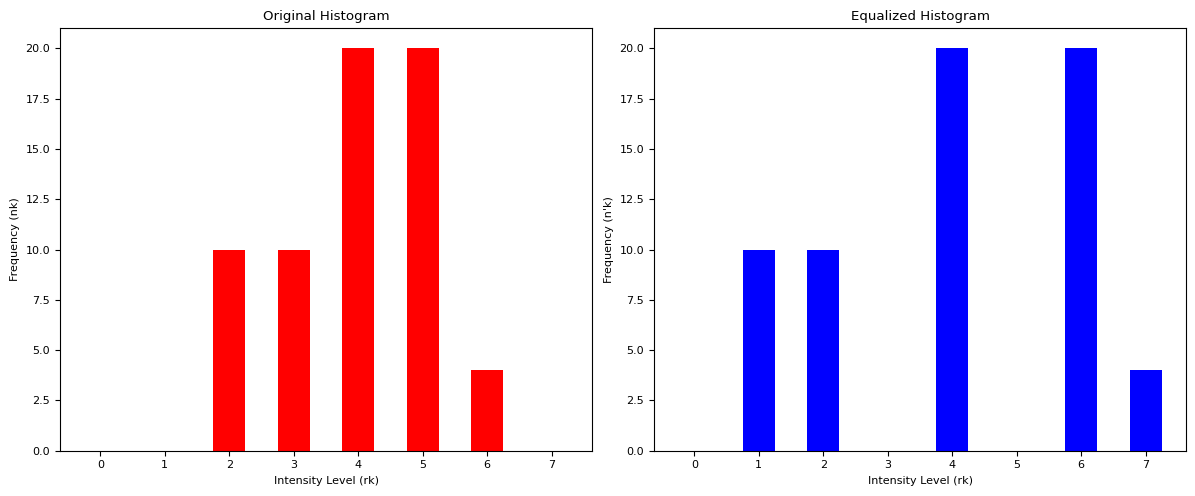

In [5]:
# Original histogram data
original_rk = np.array([0, 1, 2, 3, 4, 5, 6, 7])
original_nk = np.array([0, 0, 10, 10, 20, 20, 4, 0])

# Equalized histogram data
equalized_rk = np.array([0, 1, 2, 3, 4, 5, 6, 7])
equalized_nk = np.array([0, 10, 10, 0, 20, 0, 20, 4])

# Plotting histograms for original and equalized data
plt.figure(figsize=(12, 5))

# Plot Original Histogram
plt.subplot(1, 2, 1)
plt.bar(original_rk, original_nk, color='r', width=0.5)
plt.title('Original Histogram')
plt.xlabel('Intensity Level (rk)')
plt.ylabel('Frequency (nk)')

# Plot Equalized Histogram
plt.subplot(1, 2, 2)
plt.bar(equalized_rk, equalized_nk, color='b', width=0.5)
plt.title('Equalized Histogram')
plt.xlabel('Intensity Level (rk)')
plt.ylabel('Frequency (n\'k)')

# Show the plots
plt.tight_layout()
plt.show()

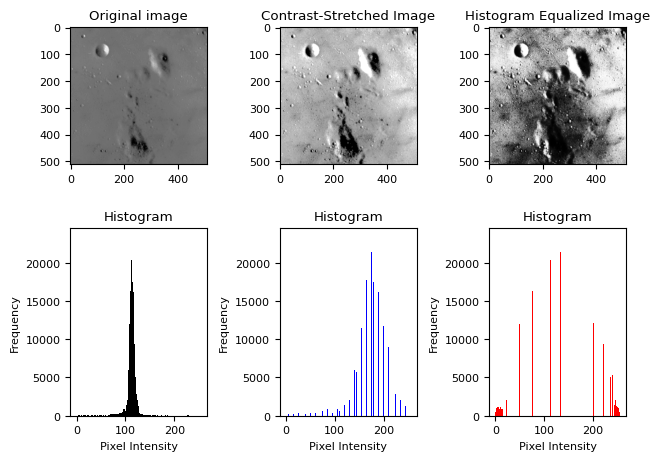

In [6]:
# Plotting
figure, ax = plt.subplots(2, 3)

# Plot first Image
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

# Plot second Image
ax[0, 1].imshow(stretched_image, cmap='gray')
ax[0, 1].set_title('Contrast-Stretched Image')


# Plot third Image
ax[0, 2].imshow(img_eq, cmap='gray')
ax[0, 2].set_title('Histogram Equalized Image')

# Plot first histogram
ax[1, 0].hist(image.ravel(), bins= 256, color='black')
ax[1, 0].set_title('Histogram')
ax[1, 0].set_xlabel('Pixel Intensity')
ax[1, 0].set_ylabel('Frequency')

# Plot second histogram
ax[1, 1].hist(stretched_image.ravel(), bins= 256,  color='blue')
ax[1, 1].set_title('Histogram')
ax[1, 1].set_xlabel('Pixel Intensity')
ax[1, 1].set_ylabel('Frequency')

# Plot third Histogram
ax[1, 2].hist(img_eq.ravel(), bins= 256,  color='r')
ax[1, 2].set_title('Histogram')
ax[1, 2].set_xlabel('Pixel Intensity')
ax[1, 2].set_ylabel('Frequency')

figure.tight_layout()
plt.show()